In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('sp500_with_indicators.csv')
print()
df.head

<bound method NDFrame.head of                             Date         Open         High          Low  \
0      1928-03-13 00:00:00-05:00    17.920000    17.920000    17.920000   
1      1928-03-14 00:00:00-05:00    17.930000    17.930000    17.930000   
2      1928-03-15 00:00:00-05:00    18.070000    18.070000    18.070000   
3      1928-03-16 00:00:00-05:00    18.260000    18.260000    18.260000   
4      1928-03-19 00:00:00-05:00    18.360001    18.360001    18.360001   
...                          ...          ...          ...          ...   
24185  2024-06-24 00:00:00-04:00  5459.580078  5490.660156  5447.589844   
24186  2024-06-25 00:00:00-04:00  5460.729980  5472.879883  5446.560059   
24187  2024-06-26 00:00:00-04:00  5460.709961  5483.140137  5451.870117   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   
24189  2024-06-28 00:00:00-04:00  5488.479980  5523.640137  5451.120117   

             Close      Volume  Dividends  Stock Splits       SMA_20 

In [3]:
# Create the target variable
#adjust thereshold to make every class have similar numer of shifted_data
threshold = 0.003
df2 = df
# df2['Close_Next_Day'] = df2['Close'].shift(-1)
df2['Change'] = (df2['Close'] - df2['Close'].shift(1))/df2['Close'] #create new feature
df2['Up'] = (df2['High'] - df2['Close'])/df2['Close']
df2['Down'] = (df2['Low'] - df2['Close'])/df2['Close']
df2['Delta_SMA'] = df2['SMA_20'] - df2['SMA_50']
df2['Delta_EMA'] = df2['EMA_20'] - df2['EMA_50']



# Drop the last row as it will have NaN in the 'Close_Next_Day'
df2 = df2.dropna()
df2 = df2[(df2['Volume'] != 0) & (df2['Up'] != 0) & (df2['Down'] != 0)]
df2 = df2[df2['Volume']!=0]
df2

Date         Open         High          Low  \
8460   1962-01-02 00:00:00-05:00     0.000000    71.959999    70.709999   
8461   1962-01-03 00:00:00-05:00     0.000000    71.480003    70.379997   
8462   1962-01-04 00:00:00-05:00     0.000000    71.620003    70.449997   
8463   1962-01-05 00:00:00-05:00     0.000000    70.839996    69.349998   
8464   1962-01-08 00:00:00-05:00     0.000000    69.839996    68.169998   
...                          ...          ...          ...          ...   
24185  2024-06-24 00:00:00-04:00  5459.580078  5490.660156  5447.589844   
24186  2024-06-25 00:00:00-04:00  5460.729980  5472.879883  5446.560059   
24187  2024-06-26 00:00:00-04:00  5460.709961  5483.140137  5451.870117   
24188  2024-06-27 00:00:00-04:00  5473.589844  5490.810059  5467.540039   
24189  2024-06-28 00:00:00-04:00  5488.479980  5523.640137  5451.120117   

             Close      Volume  Dividends  Stock Splits       SMA_20  \
8460     70.959999     3120000        0.0           0.0    71.700001   
8461     71.129997     3590000        0.0           0.0    71.656001   
8462     70.639999     4450000        0.0           0.0    71.591500   
8463     69.660004     4630000        0.0           0.0    71.475001   
8464     69.120003     4620000        0.0           0.0    71.346001   
...            ...         ...        ...           ...          ...   
24185  5447.870117  3696750000        0.0           0.0  5369.390991   
24186  5469.299805  3591960000        0.0           0.0  5377.619971   
24187  5477.899902  3563920000        0.0           0.0  5386.212964   
24188  5482.870117  3589530000        0.0           0.0  5397.008960   
24189  5460.479980  7199220000        0.0           0.0  5408.258960   

            SMA_50  ...       EMA_50        RSI       MACD  MACD_Signal  \
8460     70.839600  ...    70.754064  43.966599   0.053701     0.189011   
8461     70.893200  ...    70.768807  46.740876   0.026092     0.156427   
8462     70.946000  ...    70.763755  40.514343  -0.034925     0.118157   
8463     70.978000  ...    70.720471  31.481580  -0.160508     0.062424   
8464     71.000800  ...    70.657707  27.803163  -0.300148    -0.010090   
...            ...  ...          ...        ...        ...          ...   
24185  5237.246006  ...  5282.667639  67.178002  63.131034    58.945036   
24186  5244.163799  ...  5289.986548  69.598783  62.199211    59.595871   
24187  5252.485400  ...  5297.355699  70.537915  61.446374    59.965972   
24188  5261.114600  ...  5304.630774  71.093672  60.552786    60.083335   
24189  5269.880000  ...  5310.742508  65.133083  57.376513    59.541970   

       MACD_Diff    Change        Up      Down   Delta_SMA   Delta_EMA  
8460   -0.135310 -0.008315  0.014092 -0.003523    0.860401    0.696975  
8461   -0.130335  0.002390  0.004921 -0.010544    0.762800    0.651658  
8462   -0.153082 -0.006937  0.013873 -0.002690    0.645500    0.582379  
8463   -0.222932 -0.014068  0.016939 -0.004450    0.497001    0.465079  
8464   -0.290057 -0.007813  0.010417 -0.013744    0.345201    0.331124  
...          ...       ...       ...       ...         ...         ...  
24185   4.185998 -0.003075  0.007854 -0.000051  132.144985  101.356224  
24186   2.603340  0.003918  0.000655 -0.004158  133.456172  102.158834  
24187   1.480403  0.001570  0.000957 -0.004752  133.727563  102.956780  
24188   0.469451  0.000906  0.001448 -0.002796  135.894360  103.544337  
24189  -2.165457 -0.004100  0.011567 -0.001714  138.378960  102.414019  

[14882 rows x 21 columns]

In [4]:
df2.describe().T

count          mean           std           min           25%  \
Open          14882.0  9.405725e+02  1.187180e+03  0.000000e+00  0.000000e+00   
High          14882.0  9.783812e+02  1.168536e+03  5.283000e+01  1.040300e+02   
Low           14882.0  9.665666e+02  1.155740e+03  5.135000e+01  1.023425e+02   
Close         14882.0  9.727775e+02  1.162596e+03  5.232000e+01  1.032200e+02   
Volume        14882.0  1.408702e+09  1.841362e+09  1.950000e+06  2.146250e+07   
Dividends     14882.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
Stock Splits  14882.0  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
SMA_20        14882.0  9.695824e+02  1.157042e+03  5.500000e+01  1.030954e+02   
SMA_50        14882.0  9.645227e+02  1.148835e+03  5.648800e+01  1.029081e+02   
EMA_20        14882.0  9.696058e+02  1.156954e+03  5.554703e+01  1.031100e+02   
EMA_50        14882.0  9.646014e+02  1.148702e+03  5.687035e+01  1.027968e+02   
RSI           14882.0  5.359916e+01  1.260822e+01  1.135964e+01  4.476826e+01   
MACD          14882.0  2.383037e+00  1.669872e+01 -2.370202e+02 -8.125910e-01   
MACD_Signal   14882.0  2.371248e+00  1.562096e+01 -1.986407e+02 -7.220634e-01   
MACD_Diff     14882.0  1.178932e-02  5.213253e+00 -6.122110e+01 -5.995435e-01   
Change        14882.0 -5.079851e-05  1.015811e-02 -2.573386e-01 -4.464700e-03   
Up            14882.0  6.895765e-03  6.936001e-03  3.236181e-06  2.315710e-03   
Down          14882.0 -7.111685e-03  6.266505e-03 -1.016142e-01 -9.343463e-03   
Delta_SMA     14882.0  5.059713e+00  3.592867e+01 -4.231780e+02 -1.776700e+00   
Delta_EMA     14882.0  5.004379e+00  2.550678e+01 -2.592072e+02 -8.691365e-01   

                       50%           75%           max  
Open          4.425500e+02  1.340998e+03  5.499990e+03  
High          4.448150e+02  1.350310e+03  5.523640e+03  
Low           4.408800e+02  1.330980e+03  5.471320e+03  
Close         4.425000e+02  1.340398e+03  5.487030e+03  
Volume        2.452000e+08  3.070958e+09  1.145623e+10  
Dividends     0.000000e+00  0.000000e+00  0.000000e+00  
Stock Splits  0.000000e+00  0.000000e+00  0.000000e+00  
SMA_20        4.427370e+02  1.337243e+03  5.408259e+03  
SMA_50        4.425337e+02  1.335420e+03  5.269880e+03  
EMA_20        4.426845e+02  1.337598e+03  5.413157e+03  
EMA_50        4.430929e+02  1.339161e+03  5.310743e+03  
RSI           5.440160e+01  6.290324e+01  8.586217e+01  
MACD          6.916805e-01  5.276464e+00  9.258371e+01  
MACD_Signal   6.705645e-01  5.105330e+00  8.188411e+01  
MACD_Diff     9.585538e-03  6.213349e-01  6.089580e+01  
Change        2.527297e-04  4.813400e-03  1.037823e-01  
Up            5.473357e-03  9.257670e-03  2.573386e-01  
Down         -5.826428e-03 -3.142389e-03 -3.780052e-06  
Delta_SMA     1.387450e+00  1.094365e+01  2.014590e+02  
Delta_EMA     1.393784e+00  1.008536e+01  1.282973e+02

In [5]:
df2 = df2.drop(columns=['Open', 'Date','Dividends', 'Stock Splits'], axis=1)

In [6]:
df2 = df2.drop(columns=['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50'], axis=1)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.feature_selection import RFECV
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [38]:

class single_training():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.methods = []
        self.models = []
        self.feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f"feature_{i}" for i in range(X_train.shape[1])]

    def report(self):
        for num, model in enumerate(self.models):
            print(self.methods[num])
            ypred = model.predict(self.X_test)

            # Classification report
            print(classification_report(self.y_test, ypred))

            # Confusion matrix
            cf_matrix = confusion_matrix(self.y_test, ypred)
            plt.figure(figsize=(5, 3))
            sns.heatmap(cf_matrix, annot=True, annot_kws={"size": 15}, cmap="Spectral")
            plt.ylabel('True')
            plt.xlabel('Predicted')
            plt.show()

            # Feature importance
            if hasattr(model.best_estimator_, 'coef_'):
                importances = model.best_estimator_.coef_[0]
                self.plot_feature_importance(importances, self.feature_names, title=f"Feature Importance for {self.methods[num]}")

    def plot_feature_importance(self, importances, feature_names, title="Feature Importance"):
        indices = np.argsort(importances)[::-1]
        plt.figure(figsize=(12, 6))
        plt.title(title)
        plt.bar(range(len(importances)), importances[indices], align='center')
        plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
        plt.tight_layout()
        plt.show()

    def plot_learning_curve(self, estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Score")

        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1_macro')

        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)

        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")

        plt.legend(loc="best")
        plt.show()

    def run(self):
        self.methods = [method for method in dir(self) if callable(getattr(self, method)) and method.startswith("model")]
        print(self.methods)
        self.models = [getattr(self, method_name)() for method_name in self.methods]

    def plot_all_learning_curves(self):
        for num, model in enumerate(self.models):
            self.plot_learning_curve(model.best_estimator_, f"Learning Curve for {self.methods[num]}", self.X_train, self.y_train, cv=5, n_jobs=-1)

    def model_Logistic(self):
        pipe_Logistic = Pipeline([
            ('scaler', StandardScaler()),
            ('Logistic', LogisticRegression(random_state=2024, max_iter=2000))
        ])
        grid_params_Logistic = {
            'Logistic__C': [0.01, 0.1, 1, 10, 100],
            'Logistic__solver': ['newton-cg', 'lbfgs', 'liblinear']
        }
        self.CV_Logistic = GridSearchCV(estimator=pipe_Logistic, param_grid=grid_params_Logistic, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
        self.CV_Logistic.fit(self.X_train, self.y_train)
        return self.CV_Logistic
    def model_DecisionTree(self):
        pipe_DT = Pipeline([
            ('scaler', StandardScaler()),
            ('DT', DecisionTreeClassifier(random_state=2024))
        ])
        grid_params_DT = {'DT__max_depth': [None, 10, 20, 30], 'DT__min_samples_split': [2, 5, 10]}
        self.CV_DT = GridSearchCV(estimator=pipe_DT, param_grid=grid_params_DT, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
        self.CV_DT.fit(self.X_train, self.y_train)
        return self.CV_DT
    def model_KNN(self):
        pipe_KNN = Pipeline([
            ('scaler', StandardScaler()),
            ('KNN', KNeighborsClassifier())
        ])
        grid_params_KNN = {'KNN__n_neighbors': [3, 5, 7, 9], 'KNN__weights': ['uniform', 'distance']}
        self.CV_KNN = GridSearchCV(estimator=pipe_KNN, param_grid=grid_params_KNN, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
        self.CV_KNN.fit(self.X_train, self.y_train)
        return self.CV_KNN

i = 1
threshold = 0.003
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975       0  
8461   0.651658      -1  
8462   0.582379      -1  
8463  

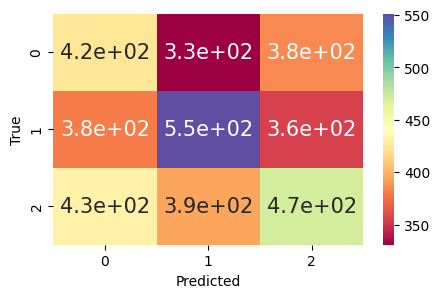

model_KNN
              precision    recall  f1-score   support

          -1       0.37      0.39      0.38      1140
           0       0.42      0.44      0.43      1286
           1       0.39      0.36      0.37      1295

    accuracy                           0.40      3721
   macro avg       0.40      0.40      0.40      3721
weighted avg       0.40      0.40      0.40      3721



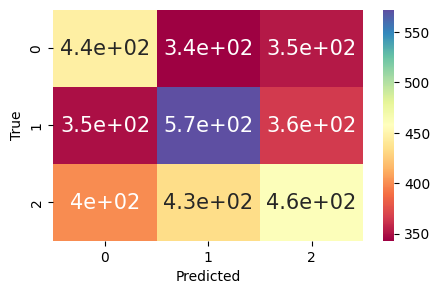

model_Logistic
              precision    recall  f1-score   support

          -1       0.37      0.35      0.36      1140
           0       0.42      0.61      0.50      1286
           1       0.42      0.25      0.31      1295

    accuracy                           0.40      3721
   macro avg       0.40      0.40      0.39      3721
weighted avg       0.40      0.40      0.39      3721



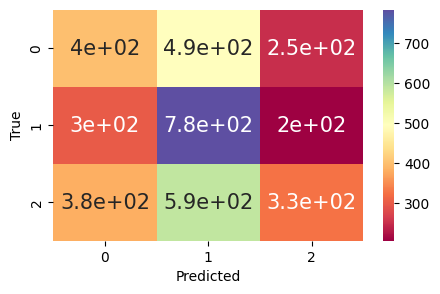

Now plotting 1 days prediction in the future


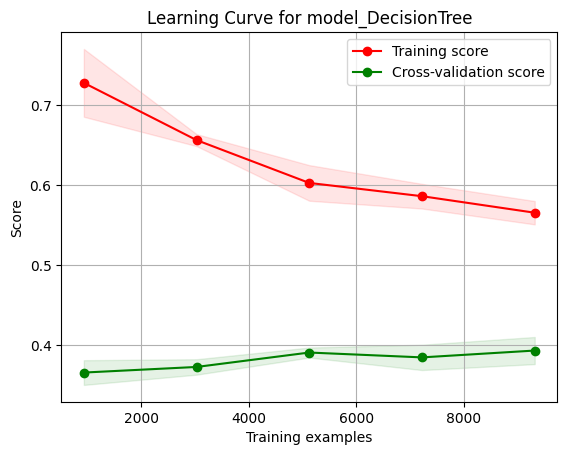

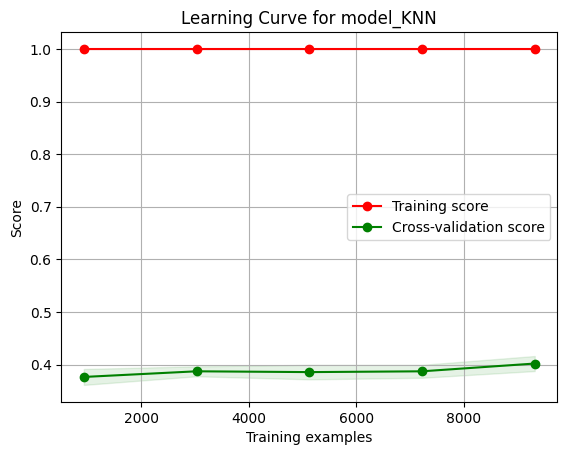

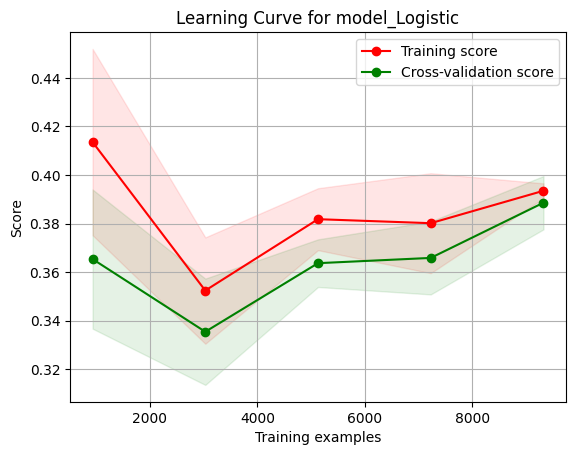

i = 2
threshold = 0.004
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463  

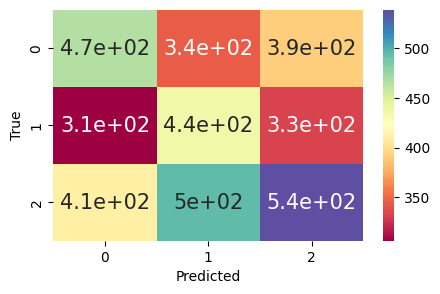

model_KNN
              precision    recall  f1-score   support

          -1       0.36      0.35      0.35      1202
           0       0.35      0.43      0.39      1074
           1       0.41      0.35      0.38      1445

    accuracy                           0.37      3721
   macro avg       0.37      0.38      0.37      3721
weighted avg       0.38      0.37      0.37      3721



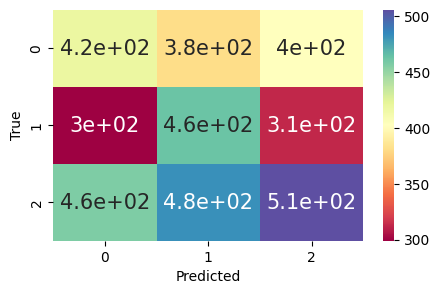

model_Logistic
              precision    recall  f1-score   support

          -1       0.37      0.37      0.37      1202
           0       0.35      0.61      0.45      1074
           1       0.44      0.21      0.29      1445

    accuracy                           0.38      3721
   macro avg       0.39      0.39      0.37      3721
weighted avg       0.39      0.38      0.36      3721



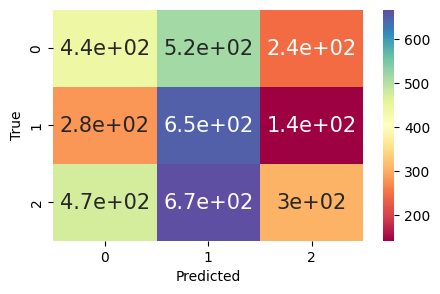

Now plotting 2 days prediction in the future


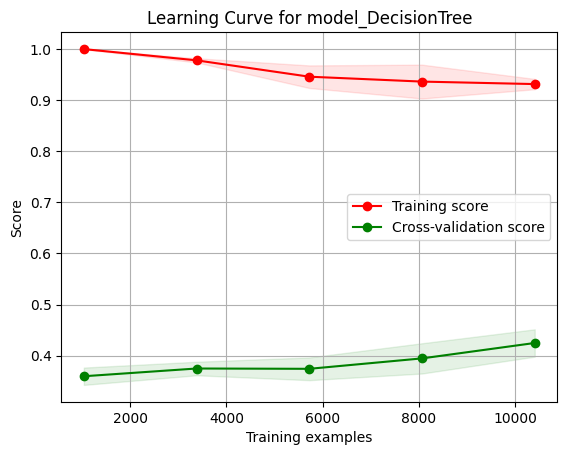

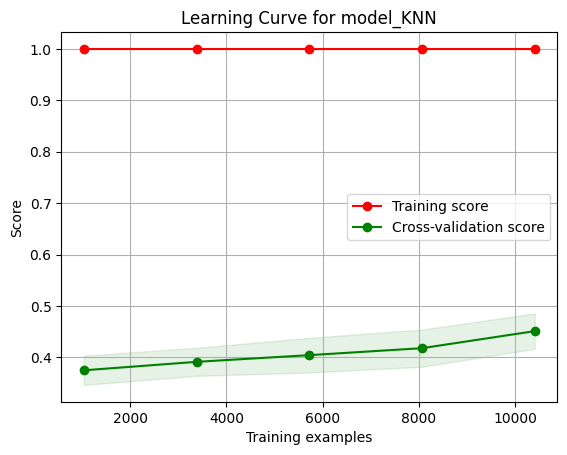

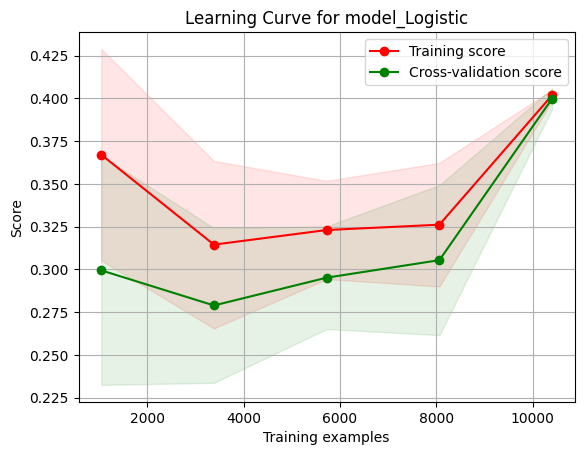

i = 3
threshold = 0.005
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463  

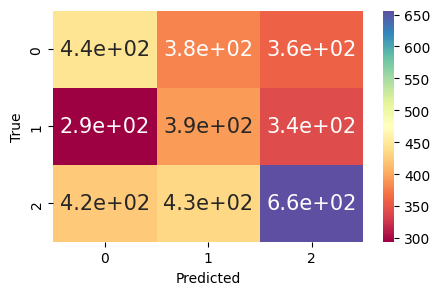

model_KNN
              precision    recall  f1-score   support

          -1       0.37      0.37      0.37      1181
           0       0.33      0.41      0.37      1027
           1       0.47      0.40      0.44      1513

    accuracy                           0.39      3721
   macro avg       0.39      0.39      0.39      3721
weighted avg       0.40      0.39      0.40      3721



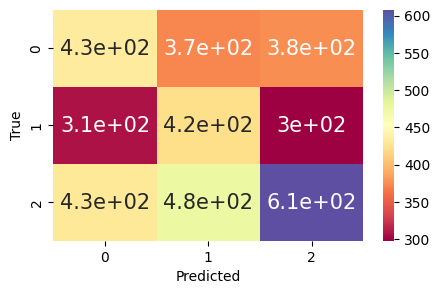

model_Logistic
              precision    recall  f1-score   support

          -1       0.37      0.38      0.37      1181
           0       0.35      0.62      0.45      1027
           1       0.47      0.22      0.30      1513

    accuracy                           0.38      3721
   macro avg       0.40      0.40      0.37      3721
weighted avg       0.41      0.38      0.36      3721



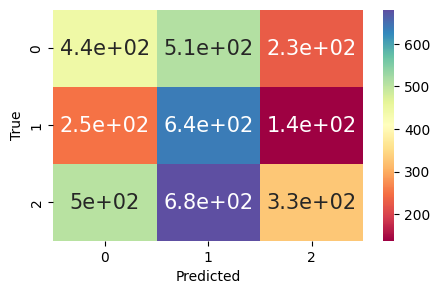

Now plotting 3 days prediction in the future


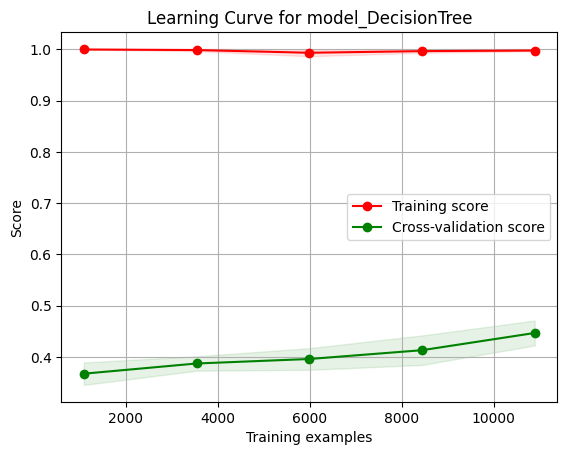

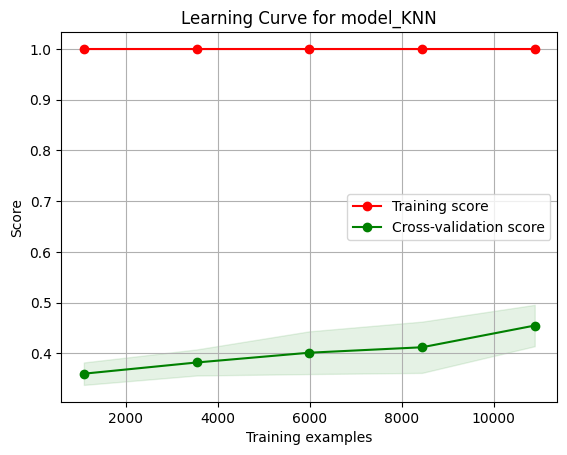

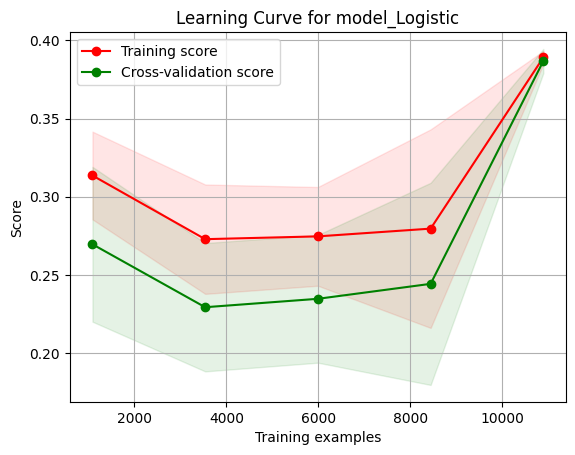

i = 4
threshold = 0.006
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463  

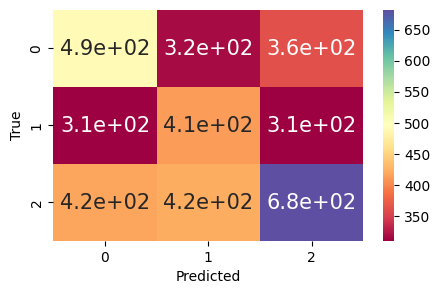

model_KNN
              precision    recall  f1-score   support

          -1       0.38      0.39      0.38      1168
           0       0.36      0.46      0.40      1033
           1       0.49      0.39      0.43      1520

    accuracy                           0.41      3721
   macro avg       0.41      0.41      0.41      3721
weighted avg       0.42      0.41      0.41      3721



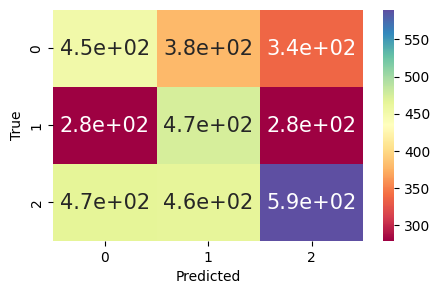

model_Logistic
              precision    recall  f1-score   support

          -1       0.37      0.39      0.38      1168
           0       0.36      0.63      0.46      1033
           1       0.47      0.21      0.29      1520

    accuracy                           0.38      3721
   macro avg       0.40      0.41      0.38      3721
weighted avg       0.41      0.38      0.37      3721



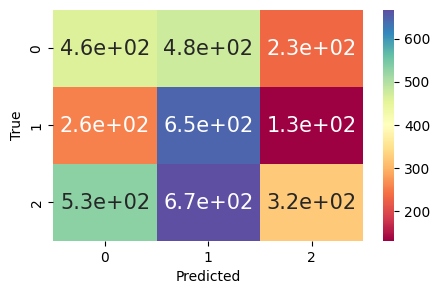

Now plotting 4 days prediction in the future


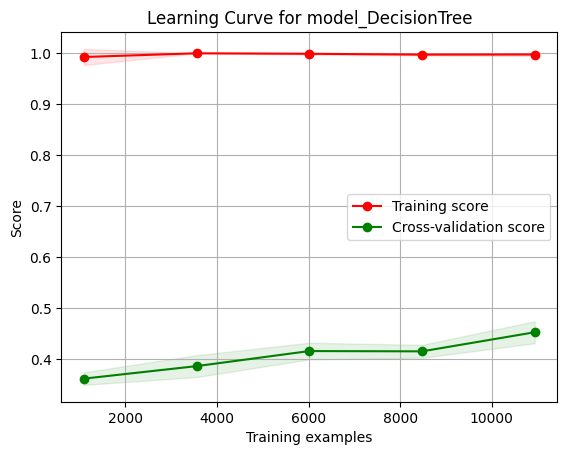

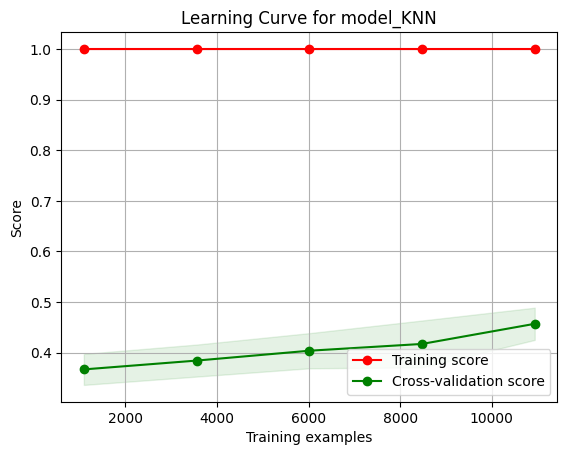

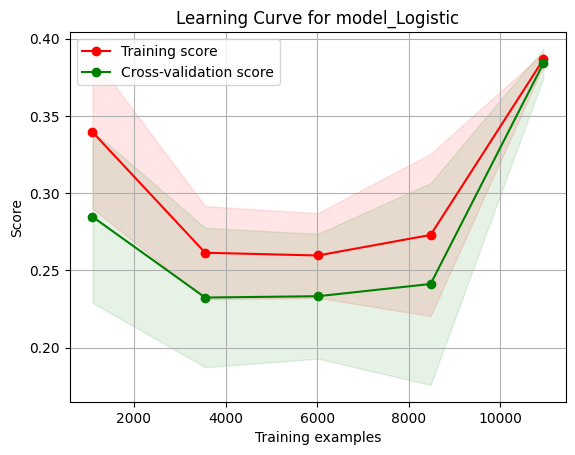

i = 5
threshold = 0.007
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463  

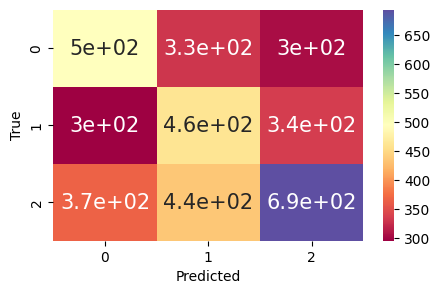

model_KNN
              precision    recall  f1-score   support

          -1       0.37      0.40      0.39      1131
           0       0.37      0.44      0.40      1094
           1       0.46      0.37      0.41      1496

    accuracy                           0.40      3721
   macro avg       0.40      0.40      0.40      3721
weighted avg       0.40      0.40      0.40      3721



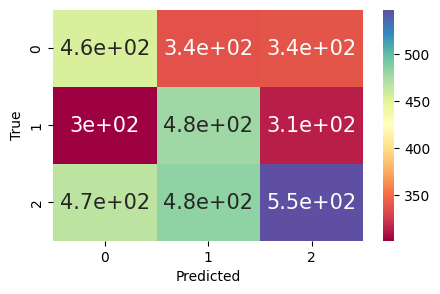

model_Logistic
              precision    recall  f1-score   support

          -1       0.35      0.38      0.36      1131
           0       0.35      0.58      0.44      1094
           1       0.46      0.20      0.28      1496

    accuracy                           0.37      3721
   macro avg       0.38      0.39      0.36      3721
weighted avg       0.39      0.37      0.35      3721



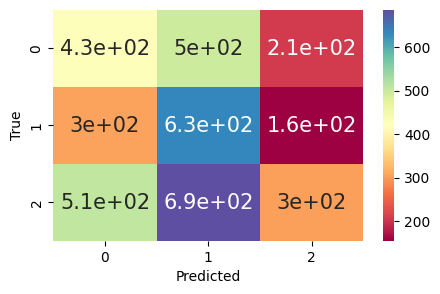

Now plotting 5 days prediction in the future


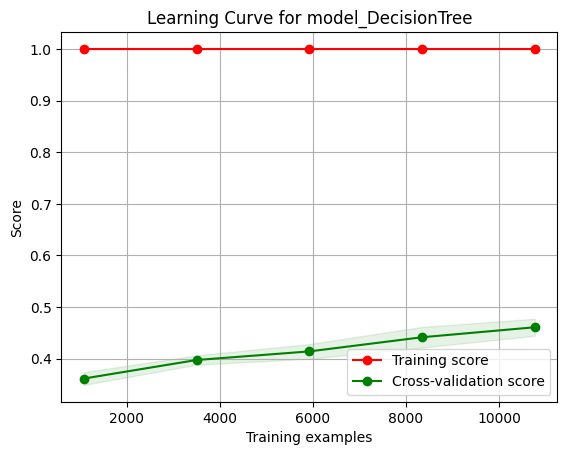

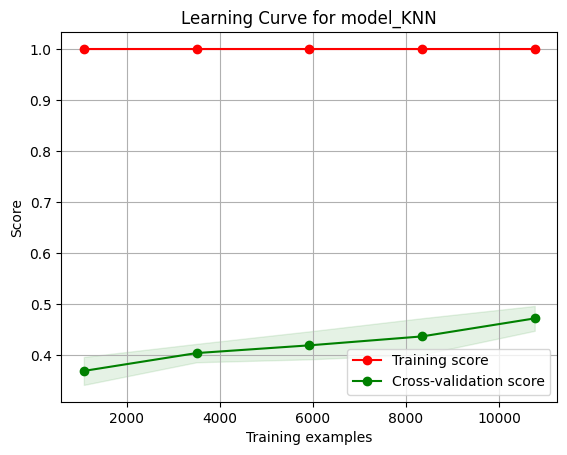

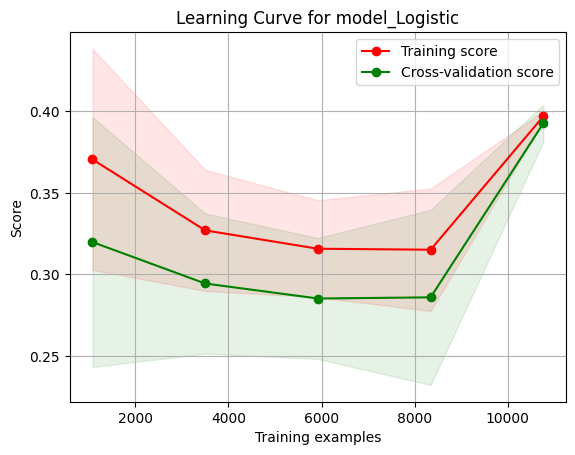

i = 6
threshold = 0.008
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463  

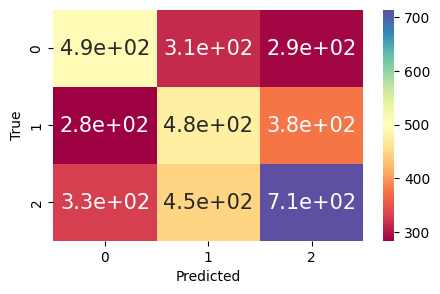

model_KNN
              precision    recall  f1-score   support

          -1       0.37      0.40      0.39      1095
           0       0.38      0.43      0.40      1136
           1       0.49      0.41      0.45      1490

    accuracy                           0.41      3721
   macro avg       0.41      0.41      0.41      3721
weighted avg       0.42      0.41      0.42      3721



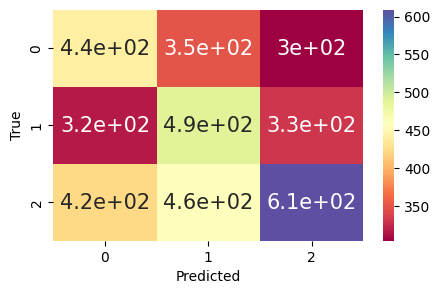

model_Logistic
              precision    recall  f1-score   support

          -1       0.34      0.40      0.37      1095
           0       0.38      0.61      0.47      1136
           1       0.46      0.20      0.27      1490

    accuracy                           0.38      3721
   macro avg       0.39      0.40      0.37      3721
weighted avg       0.40      0.38      0.36      3721



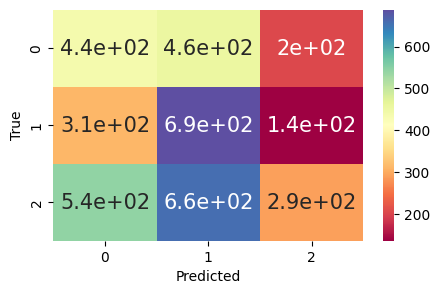

Now plotting 6 days prediction in the future


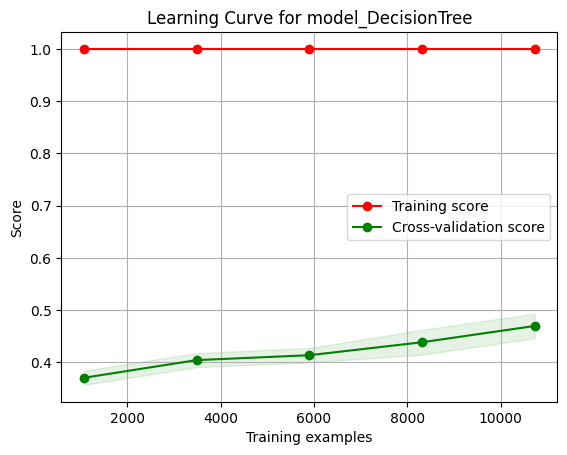

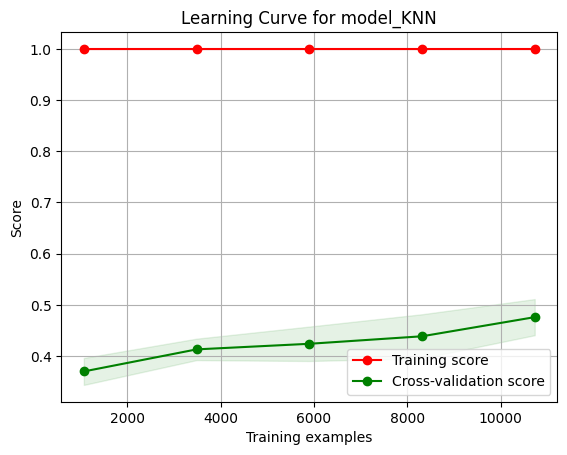

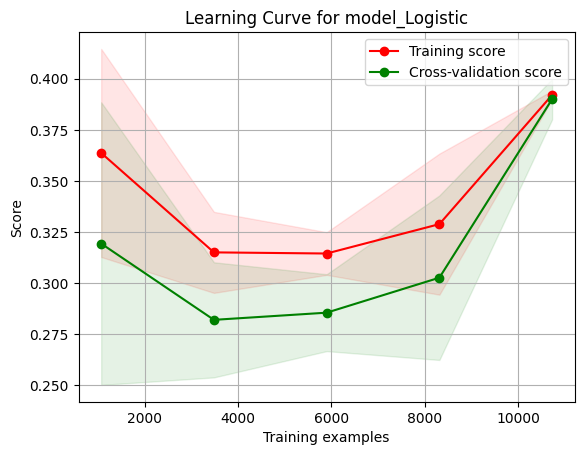

i = 7
threshold = 0.009000000000000001
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379  

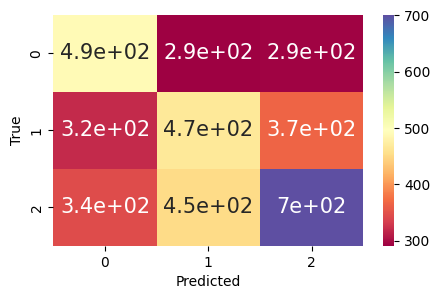

model_KNN
              precision    recall  f1-score   support

          -1       0.38      0.43      0.40      1072
           0       0.36      0.40      0.38      1151
           1       0.49      0.40      0.44      1498

    accuracy                           0.41      3721
   macro avg       0.41      0.41      0.41      3721
weighted avg       0.42      0.41      0.41      3721



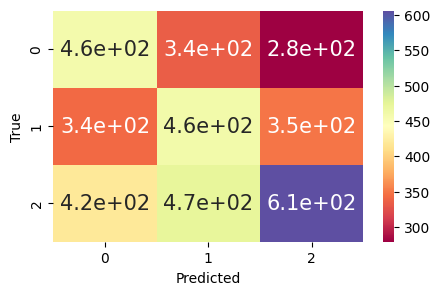

model_Logistic
              precision    recall  f1-score   support

          -1       0.33      0.42      0.37      1072
           0       0.38      0.60      0.47      1151
           1       0.49      0.18      0.26      1498

    accuracy                           0.38      3721
   macro avg       0.40      0.40      0.37      3721
weighted avg       0.41      0.38      0.36      3721



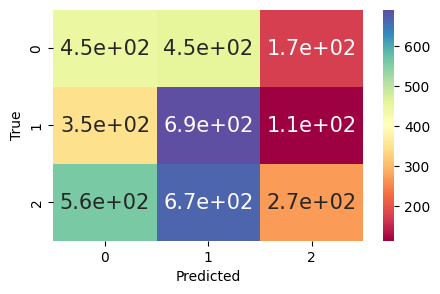

Now plotting 7 days prediction in the future


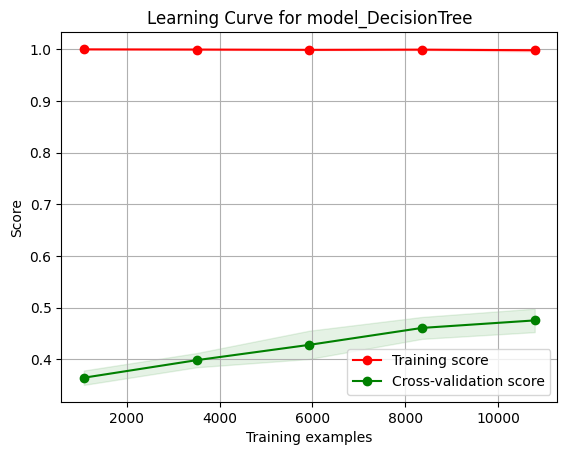

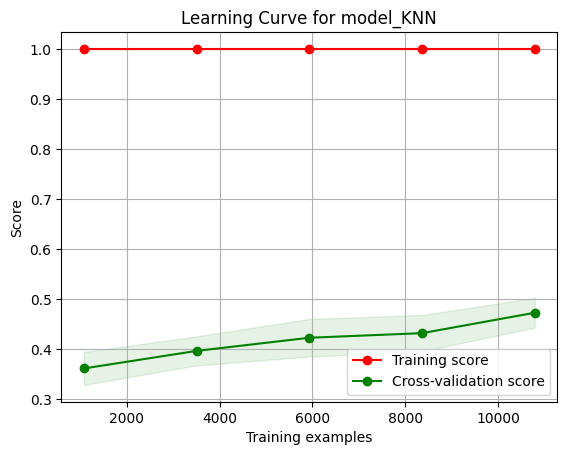

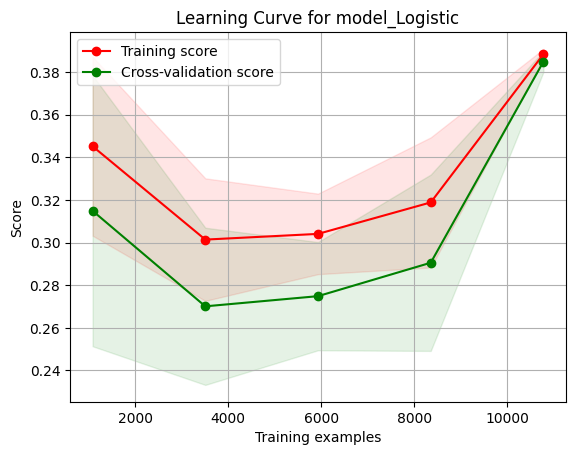

i = 8
threshold = 0.01
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463   

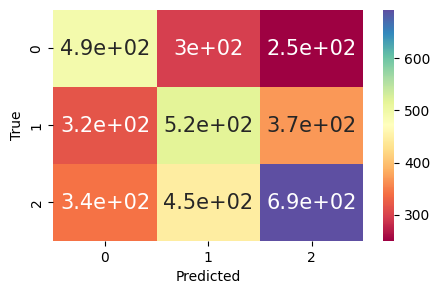

model_KNN
              precision    recall  f1-score   support

          -1       0.39      0.43      0.41      1038
           0       0.42      0.44      0.43      1202
           1       0.49      0.43      0.45      1481

    accuracy                           0.43      3721
   macro avg       0.43      0.43      0.43      3721
weighted avg       0.44      0.43      0.43      3721



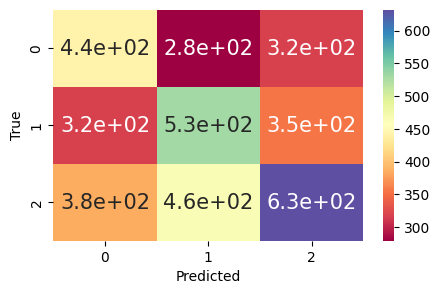

model_Logistic
              precision    recall  f1-score   support

          -1       0.34      0.40      0.37      1038
           0       0.40      0.61      0.48      1202
           1       0.50      0.21      0.30      1481

    accuracy                           0.40      3721
   macro avg       0.41      0.41      0.38      3721
weighted avg       0.42      0.40      0.38      3721



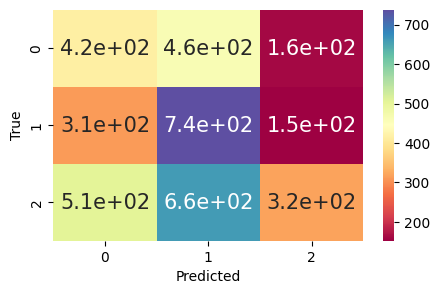

Now plotting 8 days prediction in the future


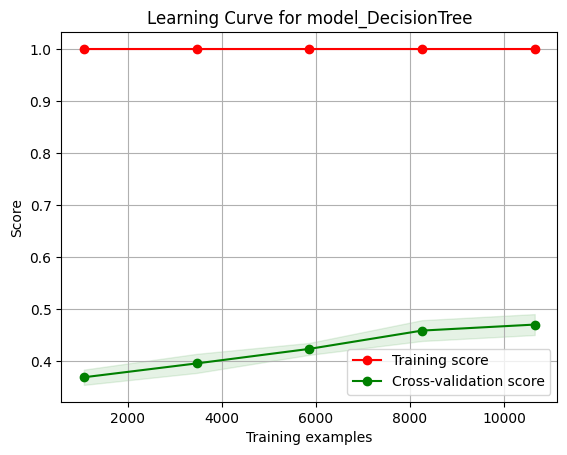

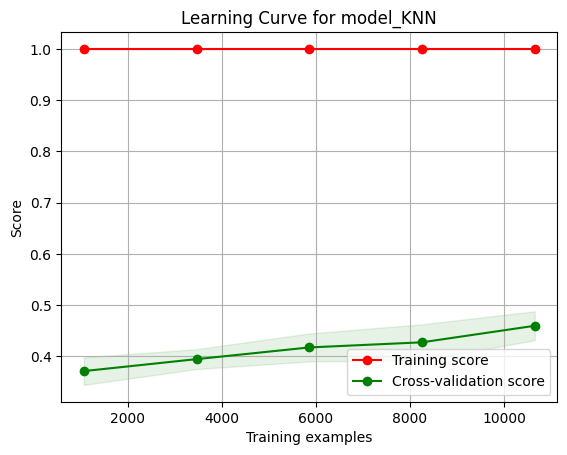

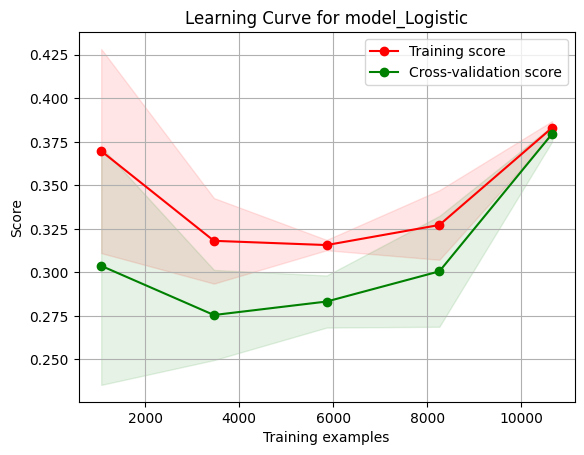

i = 9
threshold = 0.011000000000000001
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379  

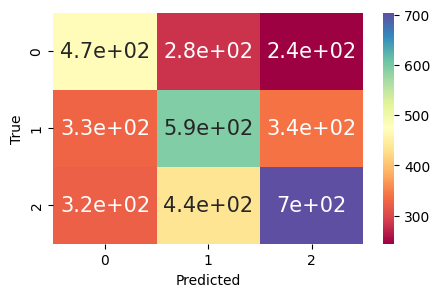

model_KNN
              precision    recall  f1-score   support

          -1       0.37      0.46      0.41       997
           0       0.43      0.44      0.44      1261
           1       0.49      0.39      0.44      1463

    accuracy                           0.43      3721
   macro avg       0.43      0.43      0.43      3721
weighted avg       0.44      0.43      0.43      3721



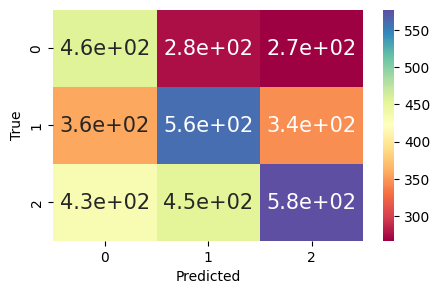

model_Logistic
              precision    recall  f1-score   support

          -1       0.33      0.44      0.38       997
           0       0.43      0.61      0.50      1261
           1       0.49      0.19      0.28      1463

    accuracy                           0.40      3721
   macro avg       0.42      0.42      0.39      3721
weighted avg       0.43      0.40      0.38      3721



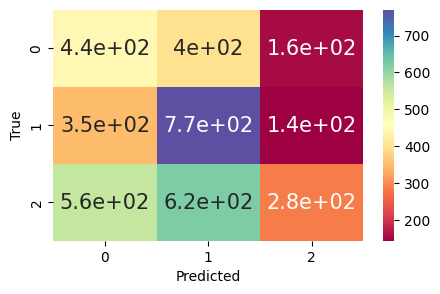

Now plotting 9 days prediction in the future


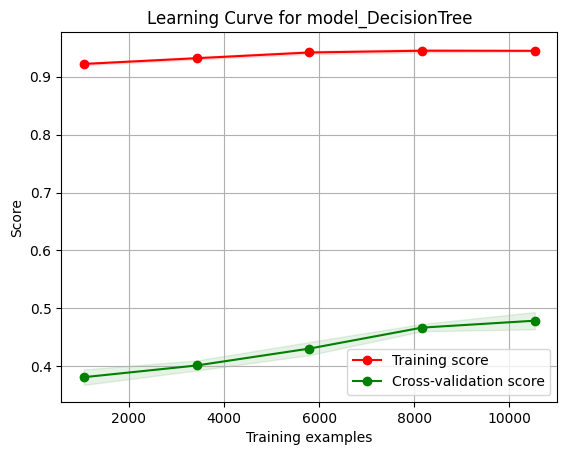

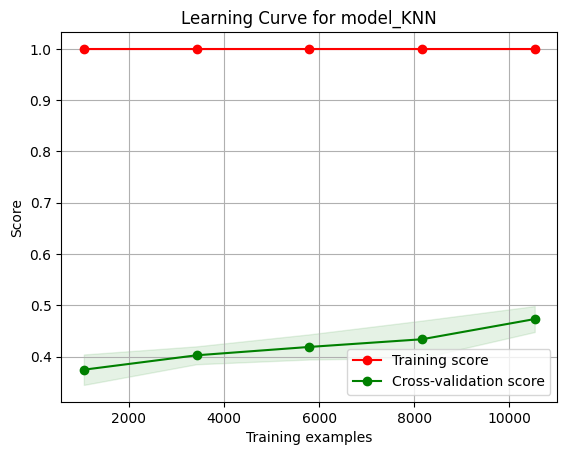

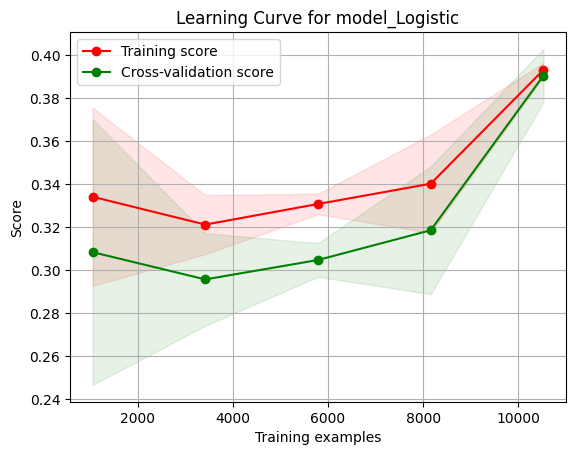

i = 10
threshold = 0.012
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463 

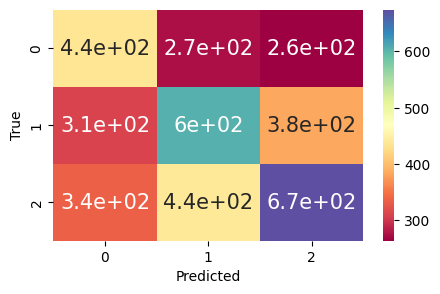

model_KNN
              precision    recall  f1-score   support

          -1       0.35      0.42      0.38       974
           0       0.42      0.42      0.42      1298
           1       0.48      0.41      0.44      1449

    accuracy                           0.42      3721
   macro avg       0.42      0.42      0.42      3721
weighted avg       0.43      0.42      0.42      3721



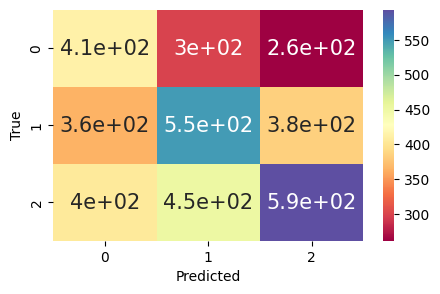

model_Logistic
              precision    recall  f1-score   support

          -1       0.32      0.42      0.36       974
           0       0.42      0.60      0.49      1298
           1       0.49      0.20      0.29      1449

    accuracy                           0.40      3721
   macro avg       0.41      0.41      0.38      3721
weighted avg       0.42      0.40      0.38      3721



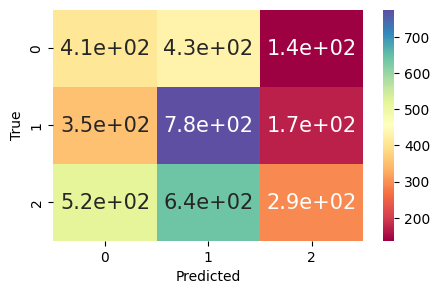

Now plotting 10 days prediction in the future


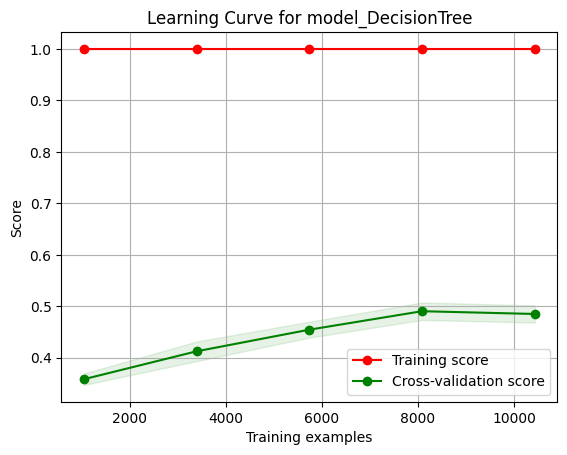

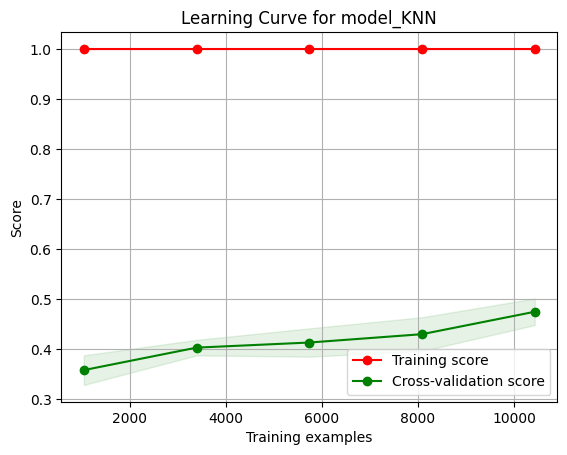

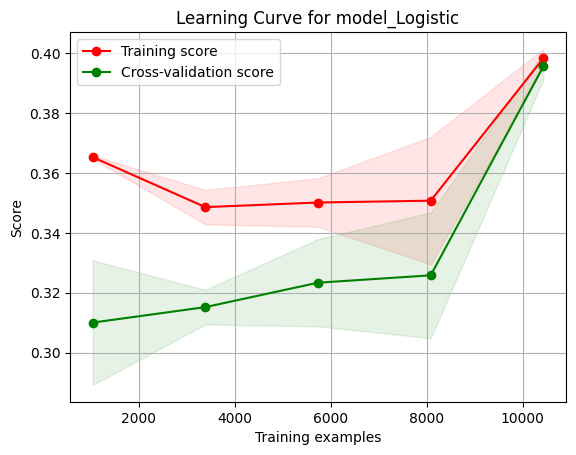

i = 11
threshold = 0.013
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463 

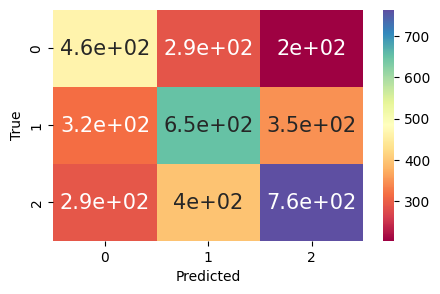

model_KNN
              precision    recall  f1-score   support

          -1       0.35      0.42      0.38       956
           0       0.45      0.45      0.45      1315
           1       0.49      0.43      0.46      1450

    accuracy                           0.43      3721
   macro avg       0.43      0.43      0.43      3721
weighted avg       0.44      0.43      0.43      3721



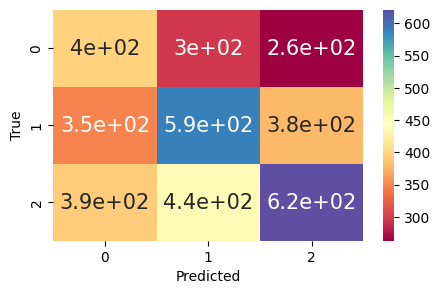

model_Logistic
              precision    recall  f1-score   support

          -1       0.31      0.39      0.35       956
           0       0.43      0.64      0.51      1315
           1       0.48      0.19      0.27      1450

    accuracy                           0.40      3721
   macro avg       0.41      0.41      0.38      3721
weighted avg       0.42      0.40      0.38      3721



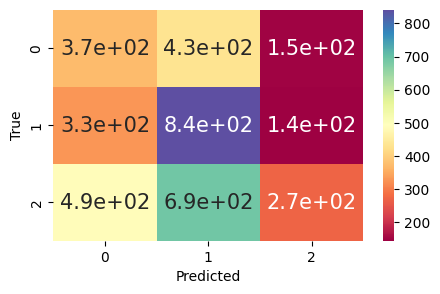

Now plotting 11 days prediction in the future


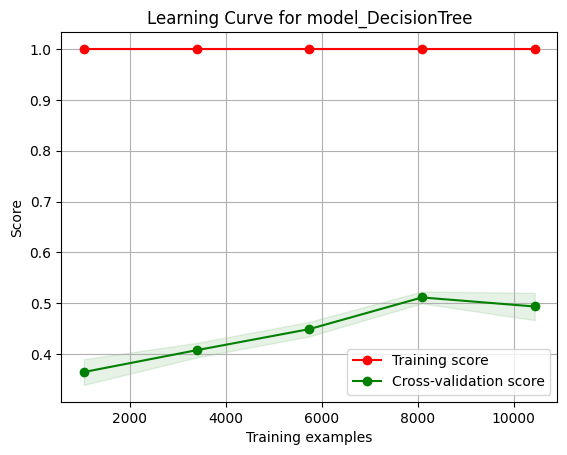

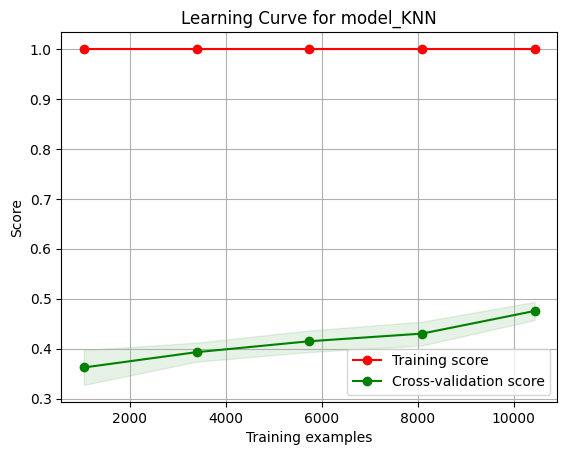

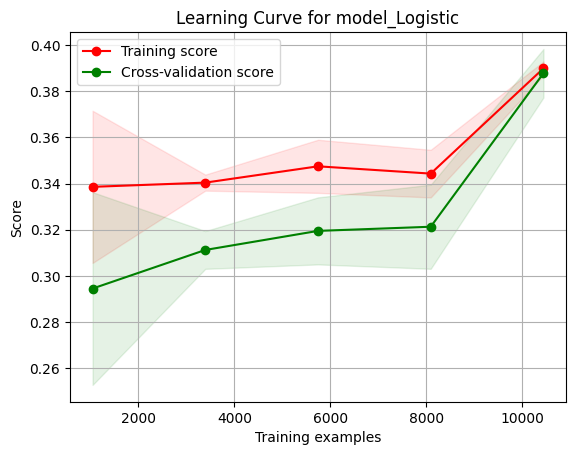

i = 12
threshold = 0.014
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463 

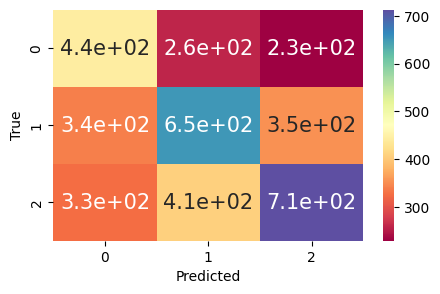

model_KNN
              precision    recall  f1-score   support

          -1       0.36      0.46      0.41       930
           0       0.49      0.46      0.47      1344
           1       0.51      0.45      0.48      1447

    accuracy                           0.46      3721
   macro avg       0.45      0.46      0.45      3721
weighted avg       0.46      0.46      0.46      3721



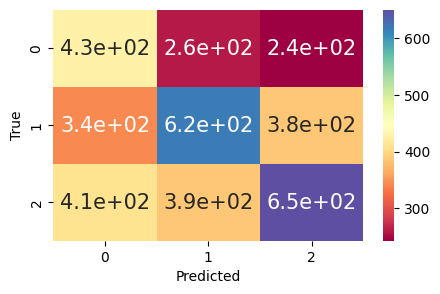

model_Logistic
              precision    recall  f1-score   support

          -1       0.29      0.38      0.33       930
           0       0.44      0.62      0.52      1344
           1       0.48      0.20      0.28      1447

    accuracy                           0.40      3721
   macro avg       0.40      0.40      0.38      3721
weighted avg       0.42      0.40      0.38      3721



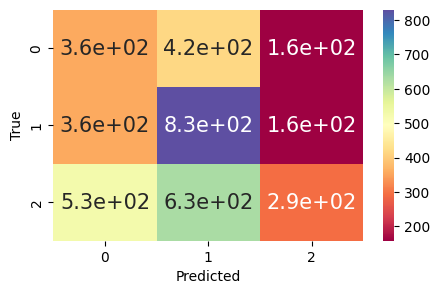

Now plotting 12 days prediction in the future


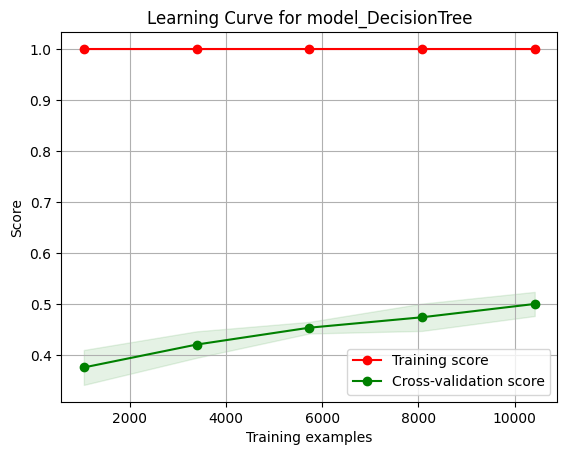

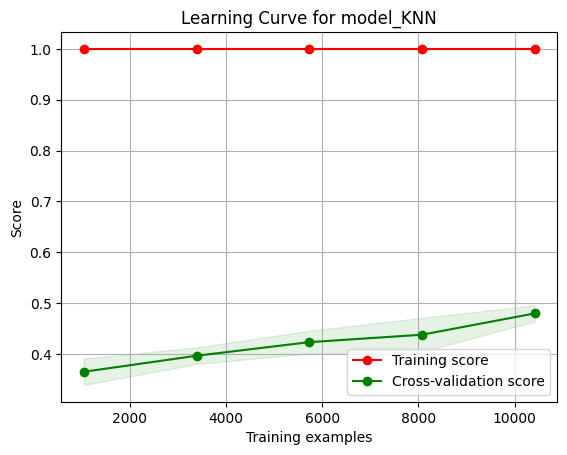

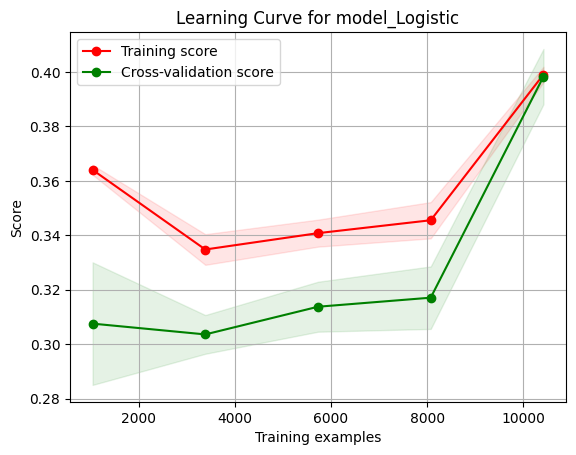

i = 13
threshold = 0.015000000000000001
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379 

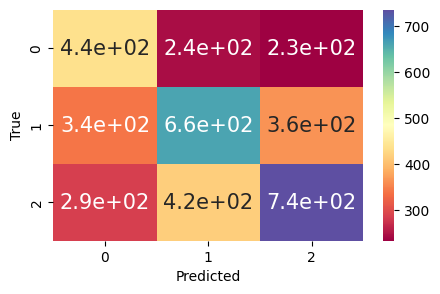

model_KNN
              precision    recall  f1-score   support

          -1       0.36      0.48      0.41       915
           0       0.48      0.45      0.47      1367
           1       0.50      0.42      0.46      1439

    accuracy                           0.45      3721
   macro avg       0.45      0.45      0.44      3721
weighted avg       0.46      0.45      0.45      3721



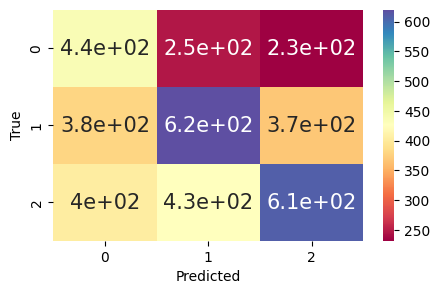

model_Logistic
              precision    recall  f1-score   support

          -1       0.28      0.37      0.32       915
           0       0.44      0.58      0.50      1367
           1       0.46      0.23      0.31      1439

    accuracy                           0.39      3721
   macro avg       0.40      0.39      0.38      3721
weighted avg       0.41      0.39      0.38      3721



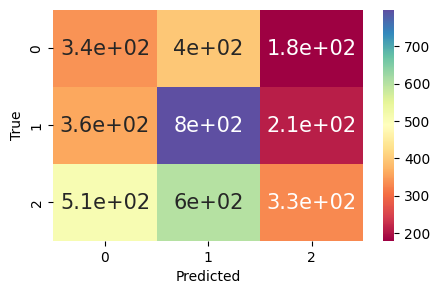

Now plotting 13 days prediction in the future


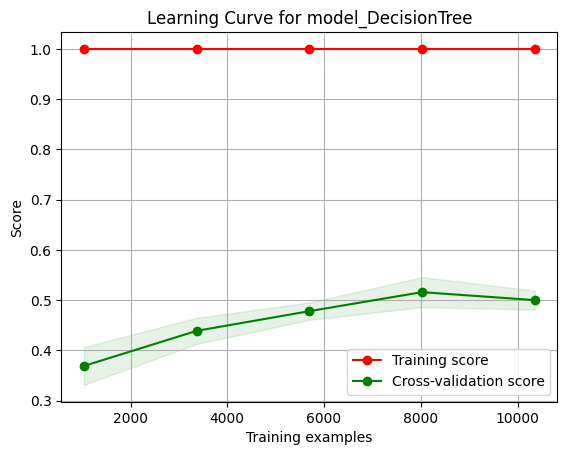

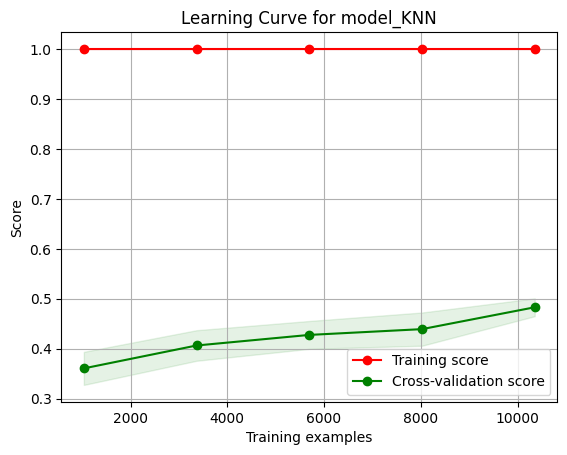

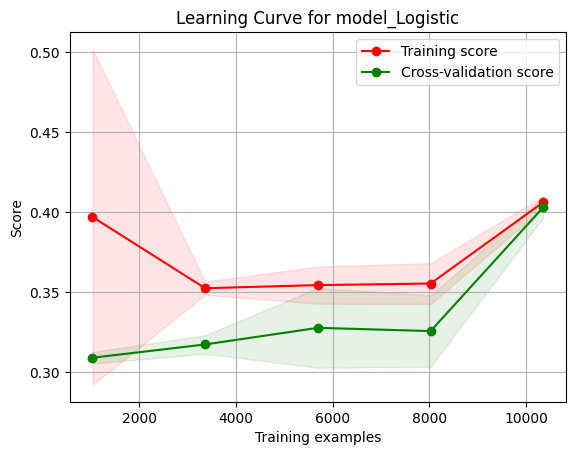

i = 14
threshold = 0.016
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463 

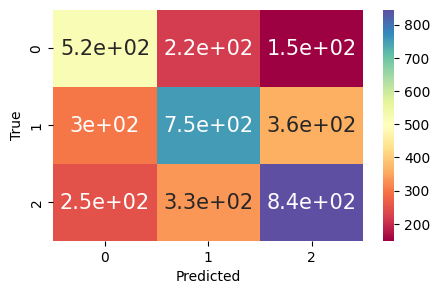

model_KNN
              precision    recall  f1-score   support

          -1       0.34      0.44      0.38       884
           0       0.48      0.46      0.47      1412
           1       0.49      0.41      0.45      1425

    accuracy                           0.44      3721
   macro avg       0.43      0.44      0.43      3721
weighted avg       0.45      0.44      0.44      3721



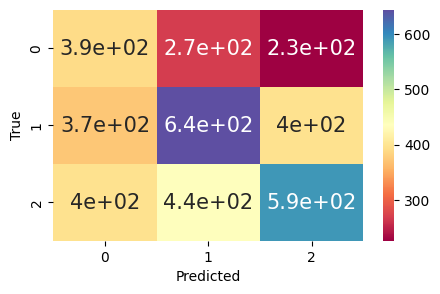

model_Logistic
              precision    recall  f1-score   support

          -1       0.29      0.40      0.34       884
           0       0.46      0.61      0.52      1412
           1       0.49      0.21      0.30      1425

    accuracy                           0.41      3721
   macro avg       0.41      0.41      0.39      3721
weighted avg       0.43      0.41      0.39      3721



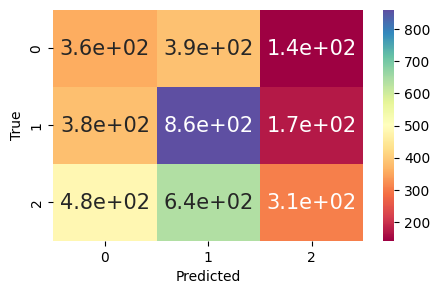

Now plotting 14 days prediction in the future


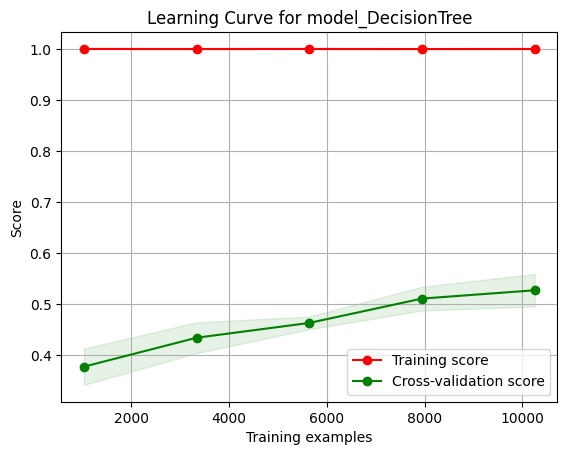

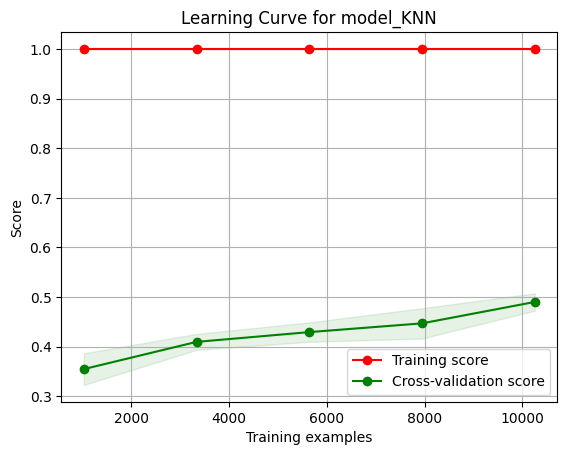

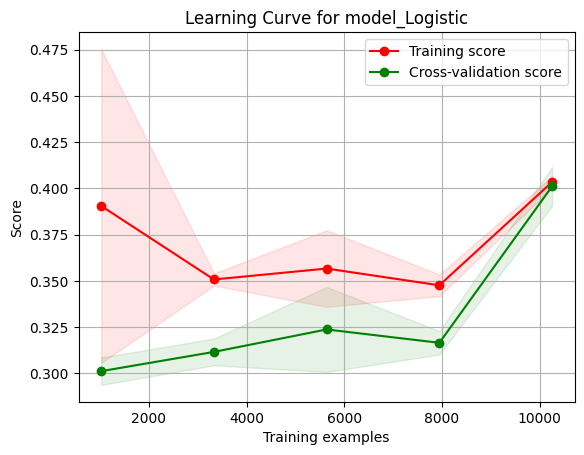

i = 15
threshold = 0.017
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379      -1  
8463 

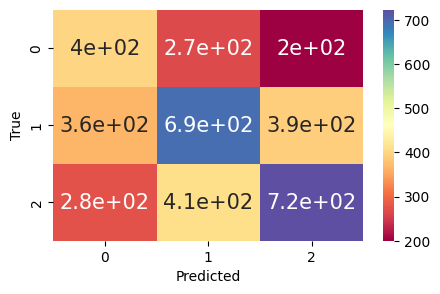

model_KNN
              precision    recall  f1-score   support

          -1       0.32      0.44      0.37       866
           0       0.49      0.43      0.46      1447
           1       0.47      0.41      0.44      1408

    accuracy                           0.43      3721
   macro avg       0.43      0.43      0.42      3721
weighted avg       0.44      0.43      0.43      3721



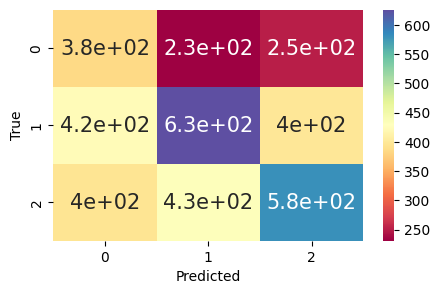

model_Logistic
              precision    recall  f1-score   support

          -1       0.29      0.42      0.34       866
           0       0.47      0.57      0.52      1447
           1       0.48      0.23      0.31      1408

    accuracy                           0.41      3721
   macro avg       0.41      0.41      0.39      3721
weighted avg       0.43      0.41      0.40      3721



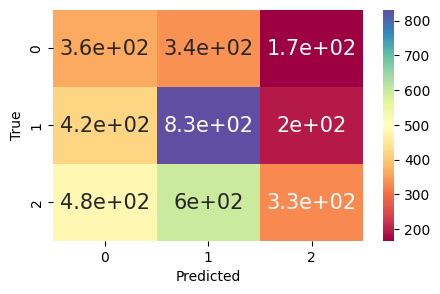

Now plotting 15 days prediction in the future


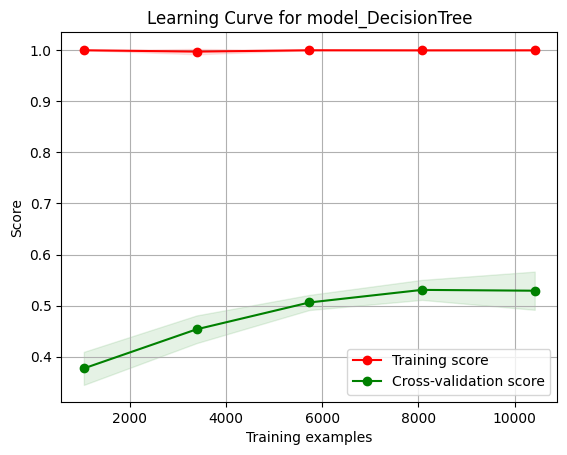

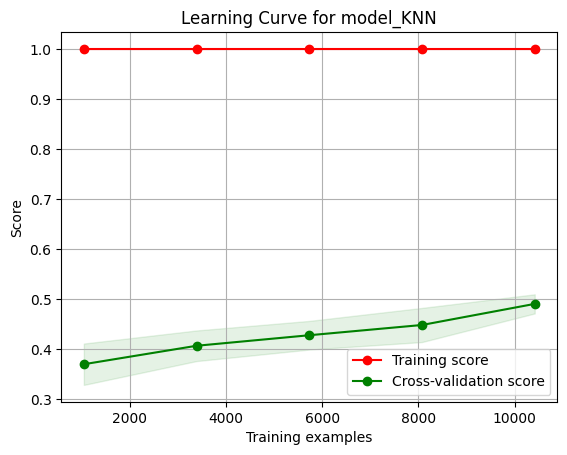

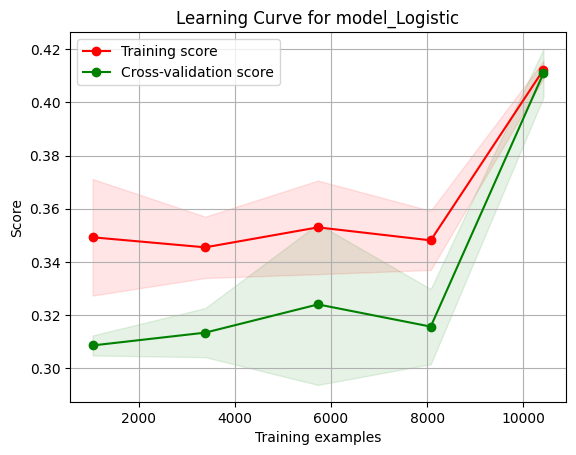

i = 16
threshold = 0.018000000000000002
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379 

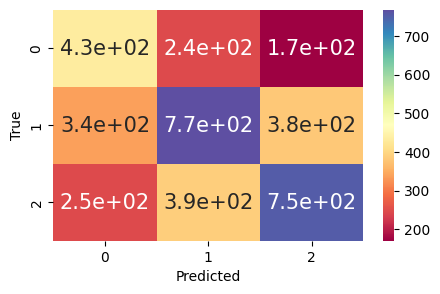

model_KNN
              precision    recall  f1-score   support

          -1       0.34      0.48      0.40       848
           0       0.52      0.47      0.50      1487
           1       0.49      0.42      0.45      1386

    accuracy                           0.45      3721
   macro avg       0.45      0.46      0.45      3721
weighted avg       0.47      0.45      0.46      3721



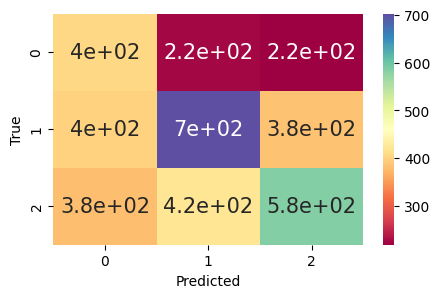

model_Logistic
              precision    recall  f1-score   support

          -1       0.29      0.35      0.32       848
           0       0.48      0.62      0.54      1487
           1       0.46      0.27      0.34      1386

    accuracy                           0.43      3721
   macro avg       0.41      0.41      0.40      3721
weighted avg       0.43      0.43      0.42      3721



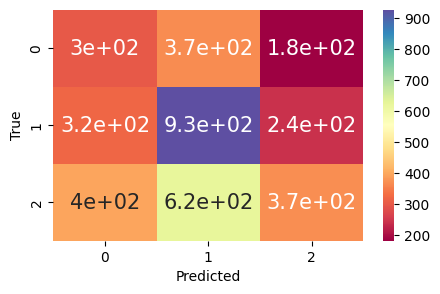

Now plotting 16 days prediction in the future


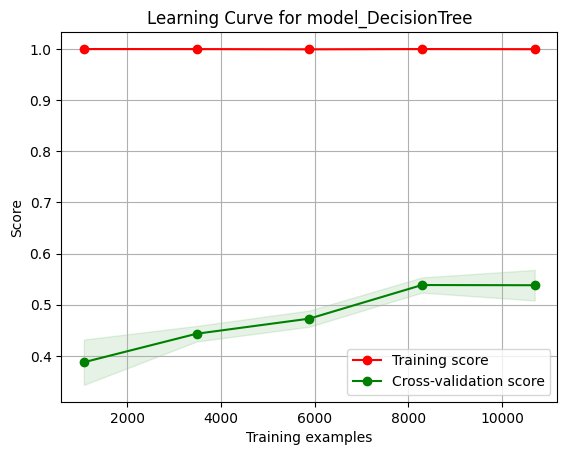

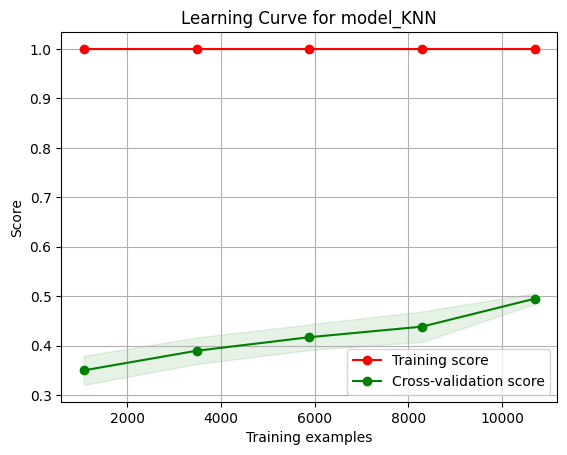

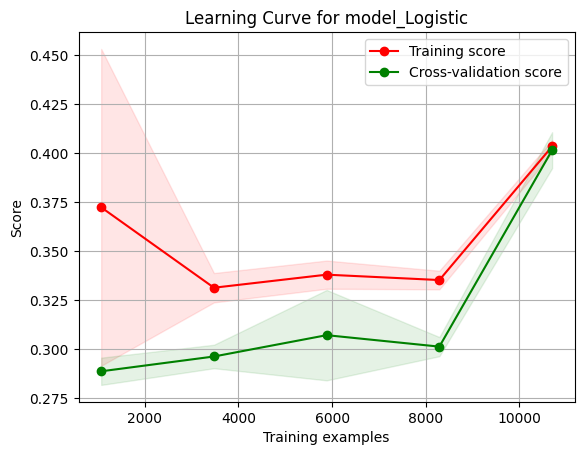

i = 17
threshold = 0.019000000000000003
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379 

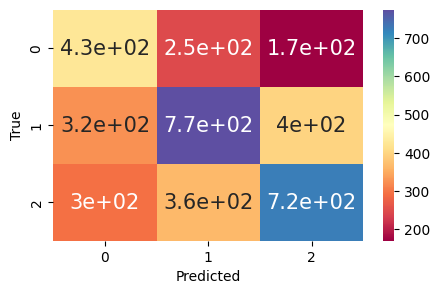

model_KNN
              precision    recall  f1-score   support

          -1       0.33      0.44      0.38       844
           0       0.51      0.45      0.48      1495
           1       0.48      0.44      0.46      1382

    accuracy                           0.44      3721
   macro avg       0.44      0.44      0.44      3721
weighted avg       0.46      0.44      0.45      3721



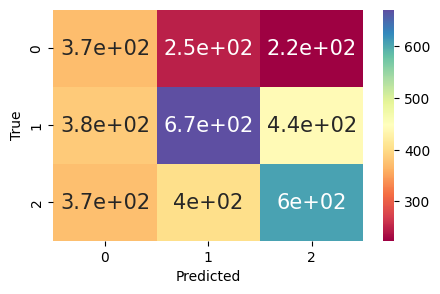

model_Logistic
              precision    recall  f1-score   support

          -1       0.29      0.38      0.33       844
           0       0.49      0.61      0.55      1495
           1       0.48      0.26      0.33      1382

    accuracy                           0.43      3721
   macro avg       0.42      0.42      0.40      3721
weighted avg       0.44      0.43      0.42      3721



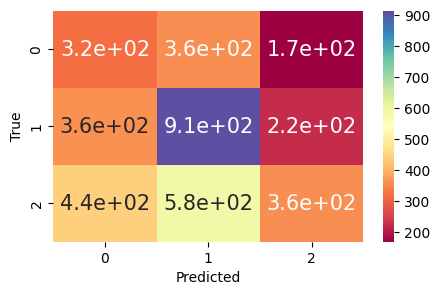

Now plotting 17 days prediction in the future


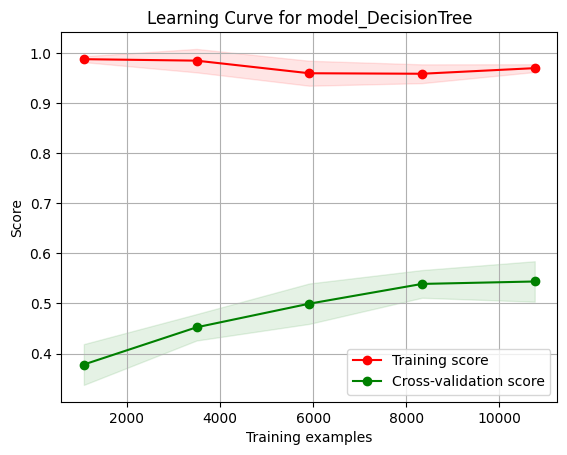

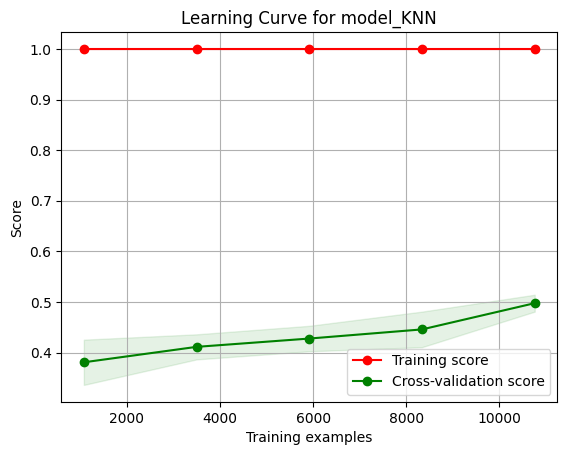

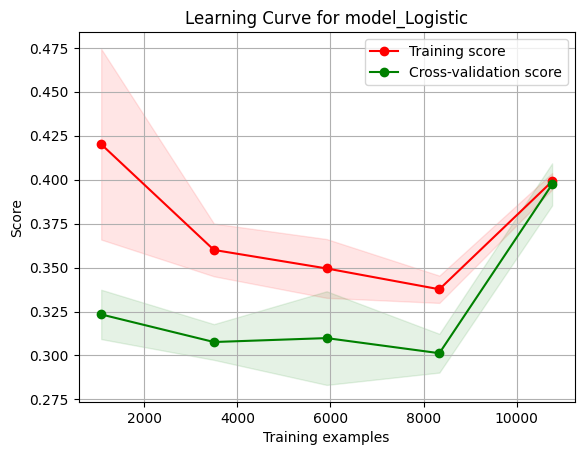

i = 18
threshold = 0.020000000000000004
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379 

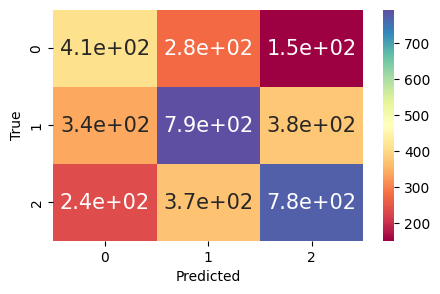

model_KNN
              precision    recall  f1-score   support

          -1       0.31      0.43      0.36       835
           0       0.50      0.43      0.46      1507
           1       0.49      0.44      0.46      1379

    accuracy                           0.43      3721
   macro avg       0.43      0.43      0.43      3721
weighted avg       0.45      0.43      0.44      3721



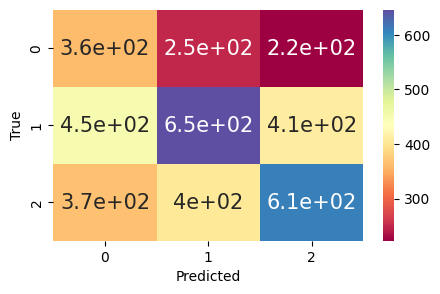

model_Logistic
              precision    recall  f1-score   support

          -1       0.25      0.37      0.30       835
           0       0.48      0.58      0.53      1507
           1       0.45      0.22      0.29      1379

    accuracy                           0.40      3721
   macro avg       0.39      0.39      0.37      3721
weighted avg       0.42      0.40      0.39      3721



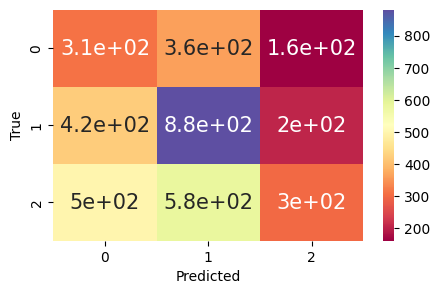

Now plotting 18 days prediction in the future


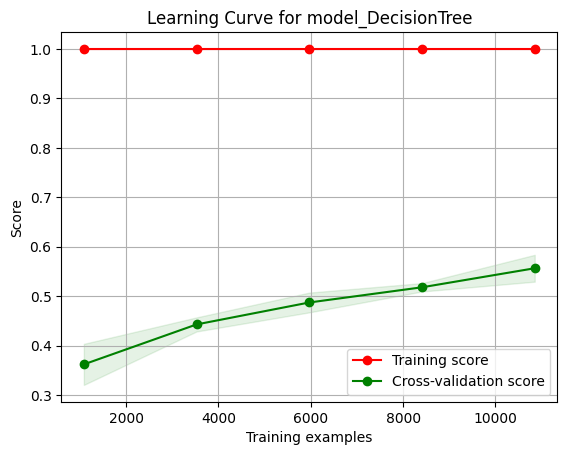

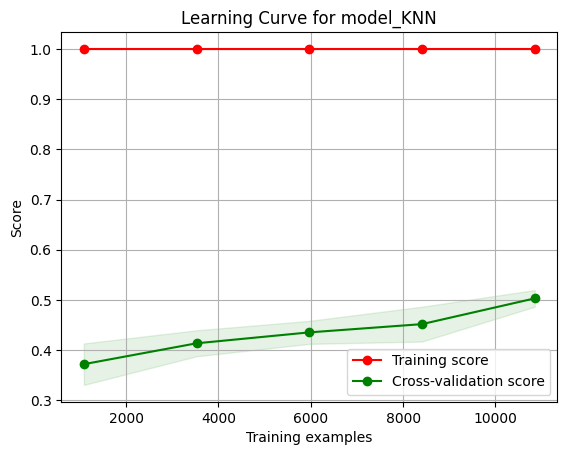

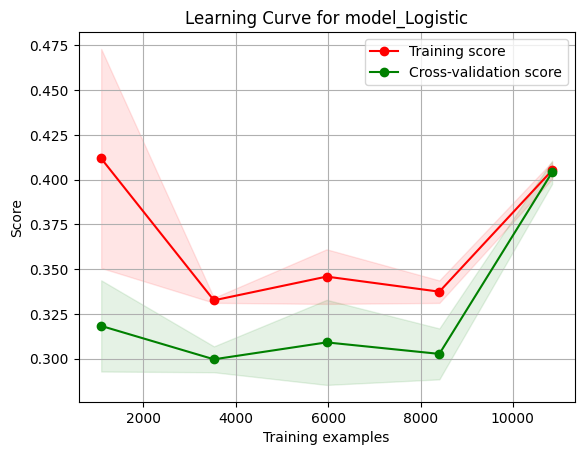

i = 19
threshold = 0.020999999999999998
           High        Low      Close   Volume        RSI      MACD  \
8460  71.959999  70.709999  70.959999  3120000  43.966599  0.053701   
8461  71.480003  70.379997  71.129997  3590000  46.740876  0.026092   
8462  71.620003  70.449997  70.639999  4450000  40.514343 -0.034925   
8463  70.839996  69.349998  69.660004  4630000  31.481580 -0.160508   
8464  69.839996  68.169998  69.120003  4620000  27.803163 -0.300148   

      MACD_Signal  MACD_Diff    Change        Up      Down  Delta_SMA  \
8460     0.189011  -0.135310 -0.008315  0.014092 -0.003523   0.860401   
8461     0.156427  -0.130335  0.002390  0.004921 -0.010544   0.762800   
8462     0.118157  -0.153082 -0.006937  0.013873 -0.002690   0.645500   
8463     0.062424  -0.222932 -0.014068  0.016939 -0.004450   0.497001   
8464    -0.010090  -0.290057 -0.007813  0.010417 -0.013744   0.345201   

      Delta_EMA  Target  
8460   0.696975      -1  
8461   0.651658      -1  
8462   0.582379 

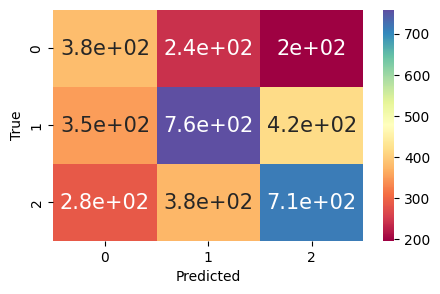

model_KNN
              precision    recall  f1-score   support

          -1       0.29      0.43      0.35       821
           0       0.50      0.42      0.45      1527
           1       0.48      0.43      0.45      1373

    accuracy                           0.42      3721
   macro avg       0.42      0.43      0.42      3721
weighted avg       0.44      0.42      0.43      3721



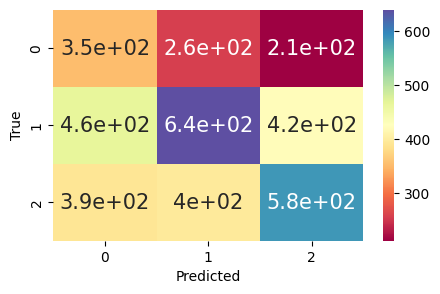

model_Logistic
              precision    recall  f1-score   support

          -1       0.27      0.39      0.32       821
           0       0.49      0.58      0.53      1527
           1       0.45      0.24      0.31      1373

    accuracy                           0.41      3721
   macro avg       0.40      0.40      0.39      3721
weighted avg       0.43      0.41      0.40      3721



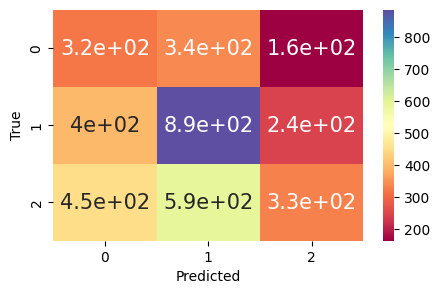

Now plotting 19 days prediction in the future


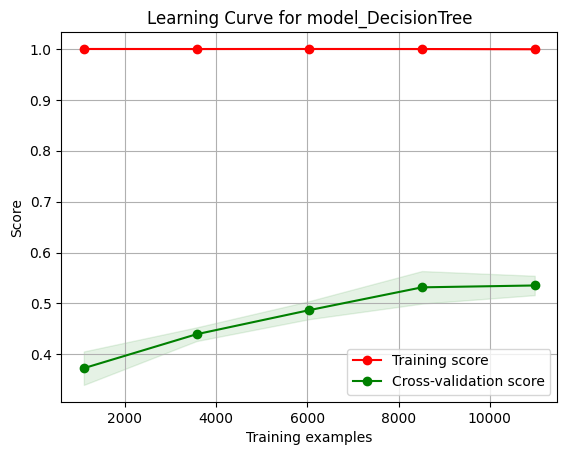

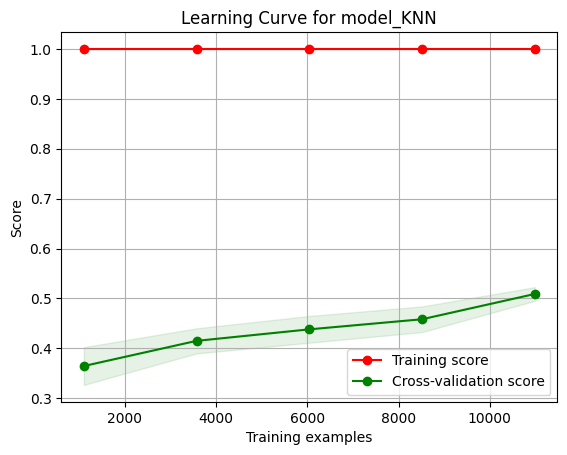

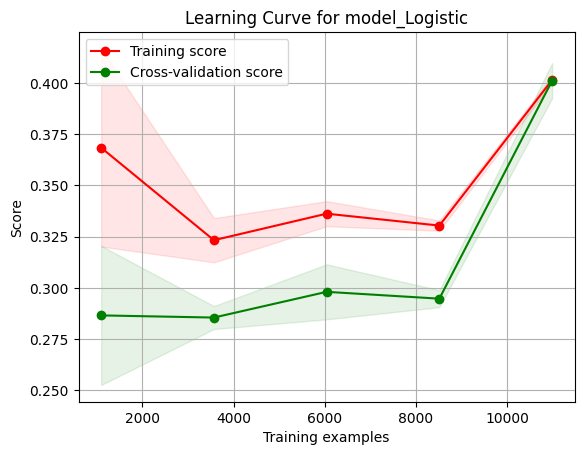

In [39]:

for i in range(1, 20):
    threshold = 0.002 + 0.001*i
    print(f'i = {i}')
    print(f'threshold = {threshold}')
    shifted_data = df2.copy()
    shifted_data['Close_Next_Day'] = df2['Close'].shift(-i)
    shifted_data['Target'] = shifted_data.apply(
        lambda row: 1 if (row['Close_Next_Day'] > row['Close'] * (1 + threshold)) else (
                    -1 if (row['Close_Next_Day'] < row['Close'] * (1 - threshold)) else 0),
        axis=1
    )
    shifted_data = shifted_data.drop(columns=['Close_Next_Day'], axis=1)
    shifted_data = shifted_data.dropna()
    print(shifted_data.head())
    print(shifted_data['Target'].value_counts())
    
    X = shifted_data.drop('Target', axis=1)
    y = shifted_data['Target']
    
    # Balance the classes using SMOTE
    smote = SMOTE(random_state=2024)
    
    
    # X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.25, shuffle=False)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    instance = single_training(X_resampled, y_resampled, X_test, y_test)
    print(f'Now training {i} days prediction in the future')
    instance.run()
    print(f'Now finishing training {i} days prediction in the future')
    print(f'Now evaluating {i} days prediction in the future')
    instance.report()
    print(f'Now plotting {i} days prediction in the future')
    instance.plot_all_learning_curves()